In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score, confusion_matrix

In [2]:
df=pd.read_csv(r"C:\work_files\Data_sets\IoTProcessed_Data.csv")

In [3]:
df.head(5)

,date,tempreature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
0,2024-02-08 06:10:00,41,63,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
1,2024-02-08 06:15:00,41,59,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
2,2024-02-08 06:20:00,41,62,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
3,2024-02-08 06:05:00,40,60,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
4,2024-02-08 06:00:00,39,61,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0


### Domain Knowledge

- Fan_actuator,
- Watering_plant_pump, 
- Water_pump_actuator
- these are the 3 IoT equipments used in the Smart Agriculture

In [4]:
df.shape

(37922, 13)

## Exploratory Data Analysis 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37922 entries, 0 to 37921
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     37920 non-null  object 
 1   tempreature              37922 non-null  int64  
 2   humidity                 37922 non-null  int64  
 3   water_level              37922 non-null  int64  
 4   N                        37922 non-null  int64  
 5   P                        37922 non-null  int64  
 6   K                        37922 non-null  int64  
 7   Fan_actuator_OFF         37922 non-null  float64
 8   Fan_actuator_ON          37922 non-null  float64
 9   Watering_plant_pump_OFF  37922 non-null  float64
 10  Watering_plant_pump_ON   37922 non-null  float64
 11  Water_pump_actuator_OFF  37922 non-null  float64
 12  Water_pump_actuator_ON   37922 non-null  float64
dtypes: float64(6), int64(6), object(1)
memory usage: 3.8+ MB


### Descriptive Analysis

In [6]:
df.describe()

,tempreature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
count,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000
mean,18.760113,50.329308,79.401587,231.963610,234.123332,225.171879,0.689863,0.310137,0.762091,0.237909,0.774142,0.225858
std,7.143422,22.995645,36.824610,34.718121,31.452138,44.877635,0.462555,0.462555,0.425809,0.425809,0.418152,0.418152
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,49.000000,79.000000,185.000000,190.000000,160.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,17.000000,59.000000,100.000000,255.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,25.000000,62.000000,100.000000,255.000000,255.000000,255.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,41.000000,100.000000,100.000000,255.000000,255.000000,259.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


There are no null vlaues present in the dataset except date column.

In [7]:
df.duplicated().sum()

0

There are zero duplicate rows present in the dataset 

In [8]:
df.columns

Index(['date', 'tempreature', 'humidity', 'water_level', 'N', 'P', 'K',
       'Fan_actuator_OFF', 'Fan_actuator_ON', 'Watering_plant_pump_OFF',
       'Watering_plant_pump_ON', 'Water_pump_actuator_OFF',
       'Water_pump_actuator_ON'],
      dtype='object')

In [9]:
for column in df.columns:
    print("-------------------")
    print(column,df[column].value_counts())
    print("******************************")

-------------------
date date
2024-01-12 04:26:00    10
2024-01-12 04:04:00    10
2024-01-12 05:24:00    10
2024-01-12 04:51:00    10
2024-01-12 03:42:00    10
                       ..
2024-02-19 08:24:00     1
2024-02-19 00:04:00     1
2024-02-18 08:29:00     1
2024-02-18 00:34:00     1
2024-02-02 22:40:00     1
Name: count, Length: 28682, dtype: int64
******************************
-------------------
tempreature tempreature
12    3752
13    3047
14    2615
15    2554
16    2421
29    1792
30    1628
17    1626
11    1612
18    1535
28    1195
10    1170
20    1156
22    1125
19    1118
23    1067
27    1064
31     974
26     960
25     864
21     818
24     816
32     651
9      587
8      393
33     367
7      204
34     199
6      160
5      126
4      117
35     104
36      56
3       25
37      16
38       3
41       3
40       1
39       1
Name: count, dtype: int64
******************************
-------------------
humidity humidity
60    4156
59    3567
61    2944
58    2629


- We found the value counts for each column 

- > ####  We need to drop the columns Water_pump_actuator_OFF, Watering_plant_pump_OFF, Fan_actuator_OFF  and by considering Water_pump_actuator_ON, Watering_plant_pump_ON, Fan_actuator_ON  as a column  and renaming the column as Water_pump_actuator, Watering_plant_pump, Fan_actuator.

In [10]:
df.drop(['Fan_actuator_OFF','Watering_plant_pump_OFF','Water_pump_actuator_OFF'],axis=1, inplace=True)

In [11]:
df

,date,tempreature,humidity,water_level,N,P,K,Fan_actuator_ON,Watering_plant_pump_ON,Water_pump_actuator_ON
0,2024-02-08 06:10:00,41,63,100,255,255,255,1.0,0.0,0.0
1,2024-02-08 06:15:00,41,59,100,255,255,255,1.0,0.0,0.0
2,2024-02-08 06:20:00,41,62,100,255,255,255,1.0,0.0,0.0
3,2024-02-08 06:05:00,40,60,100,255,255,255,1.0,0.0,0.0
4,2024-02-08 06:00:00,39,61,100,255,255,255,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
37917,2024-02-02 22:20:00,3,59,100,255,255,255,0.0,0.0,0.0
37918,2024-02-02 22:25:00,3,60,100,255,255,255,0.0,0.0,0.0
37919,2024-02-02 22:30:00,3,60,100,255,255,255,0.0,0.0,0.0
37920,2024-02-02 22:35:00,3,59,100,255,255,255,0.0,0.0,0.0


In [12]:
df.drop(['date'],axis=1,inplace=True)

In [13]:
df

,tempreature,humidity,water_level,N,P,K,Fan_actuator_ON,Watering_plant_pump_ON,Water_pump_actuator_ON
0,41,63,100,255,255,255,1.0,0.0,0.0
1,41,59,100,255,255,255,1.0,0.0,0.0
2,41,62,100,255,255,255,1.0,0.0,0.0
3,40,60,100,255,255,255,1.0,0.0,0.0
4,39,61,100,255,255,255,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
37917,3,59,100,255,255,255,0.0,0.0,0.0
37918,3,60,100,255,255,255,0.0,0.0,0.0
37919,3,60,100,255,255,255,0.0,0.0,0.0
37920,3,59,100,255,255,255,0.0,0.0,0.0


In [14]:
for column in df.columns:
    print("minimun_value of",column,df[column].min())
    print("maximumn_value of",column,df[column].max())
    print("*************")

minimun_value of tempreature 3
maximumn_value of tempreature 41
*************
minimun_value of humidity 0
maximumn_value of humidity 100
*************
minimun_value of water_level 0
maximumn_value of water_level 100
*************
minimun_value of N 0
maximumn_value of N 255
*************
minimun_value of P 0
maximumn_value of P 255
*************
minimun_value of K 0
maximumn_value of K 259
*************
minimun_value of Fan_actuator_ON 0.0
maximumn_value of Fan_actuator_ON 1.0
*************
minimun_value of Watering_plant_pump_ON 0.0
maximumn_value of Watering_plant_pump_ON 1.0
*************
minimun_value of Water_pump_actuator_ON 0.0
maximumn_value of Water_pump_actuator_ON 1.0
*************


### Data Preparation

In [15]:
df['Water_pump_actuator']=df['Water_pump_actuator_ON']

In [16]:
df['Watering_plant_pump']=df['Watering_plant_pump_ON']

In [17]:
df['Fan_actuator']=df['Fan_actuator_ON']

In [18]:
df.drop(['Fan_actuator_ON','Watering_plant_pump_ON','Water_pump_actuator_ON'],axis=1,inplace=True)

In [19]:
df

,tempreature,humidity,water_level,N,P,K,Water_pump_actuator,Watering_plant_pump,Fan_actuator
0,41,63,100,255,255,255,0.0,0.0,1.0
1,41,59,100,255,255,255,0.0,0.0,1.0
2,41,62,100,255,255,255,0.0,0.0,1.0
3,40,60,100,255,255,255,0.0,0.0,1.0
4,39,61,100,255,255,255,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
37917,3,59,100,255,255,255,0.0,0.0,0.0
37918,3,60,100,255,255,255,0.0,0.0,0.0
37919,3,60,100,255,255,255,0.0,0.0,0.0
37920,3,59,100,255,255,255,0.0,0.0,0.0


In [20]:
df.columns

Index(['tempreature', 'humidity', 'water_level', 'N', 'P', 'K',
       'Water_pump_actuator', 'Watering_plant_pump', 'Fan_actuator'],
      dtype='object')

- > K column  has 2 records with 0 value and the starting value is  140
- > p and N have 3 records of 0 level and start with above 150  so we can consider the range of N,P, and K values from 140 to 255 

### Exploratory Data Analysis

 ### Univariate Analysis 

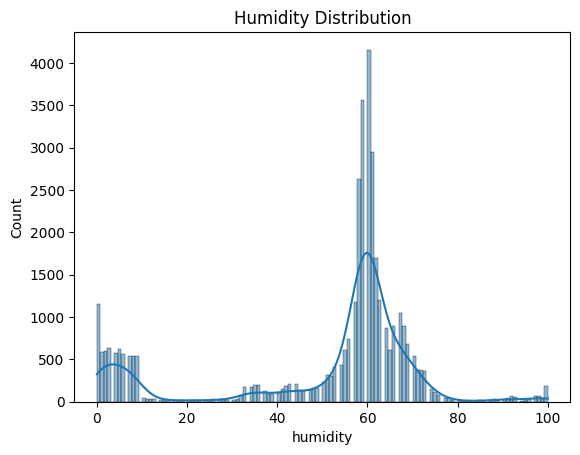

In [21]:
sns.histplot(df["humidity"],kde=True)
plt.title("Humidity Distribution")
plt.show()

- > Humidity values mainly ranges from 45 to 65

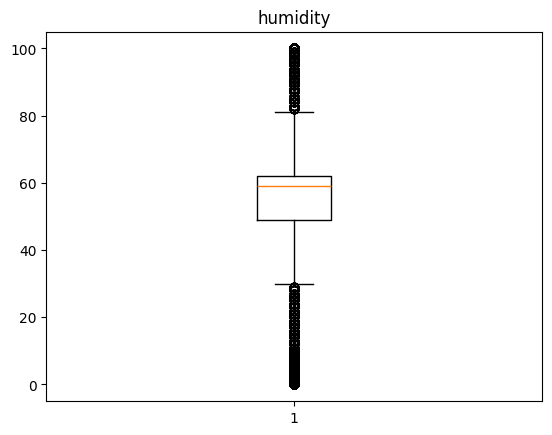

In [22]:
plt.boxplot(df["humidity"])
plt.title("humidity")
plt.show()

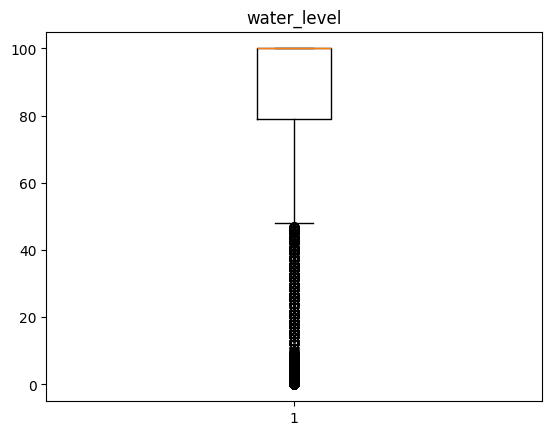

In [23]:
plt.boxplot(df["water_level"])
plt.title("water_level")
plt.show()

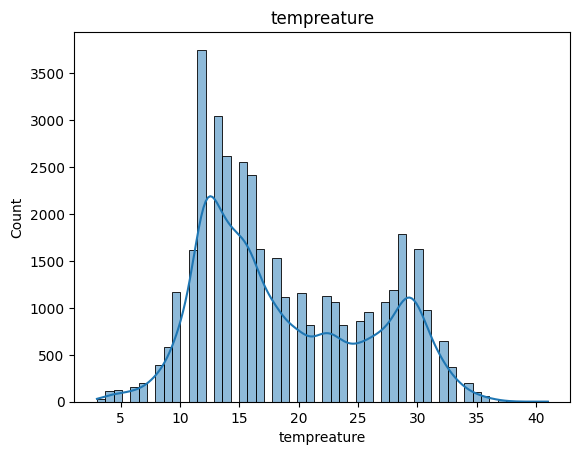

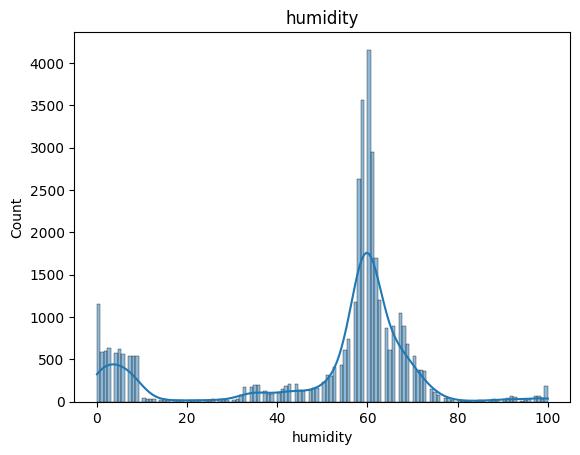

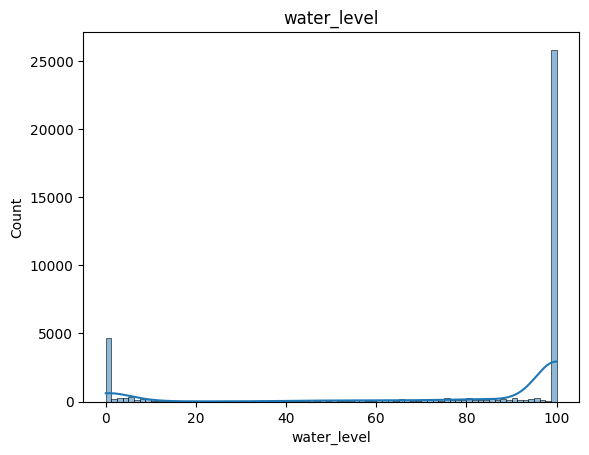

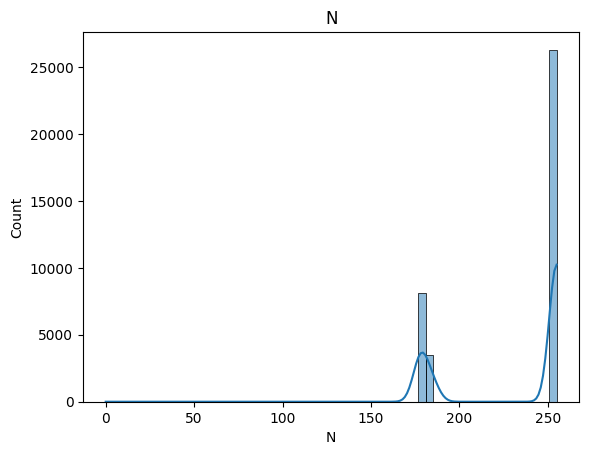

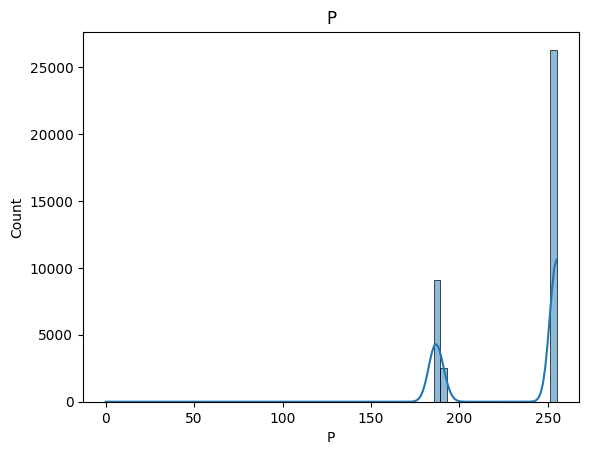

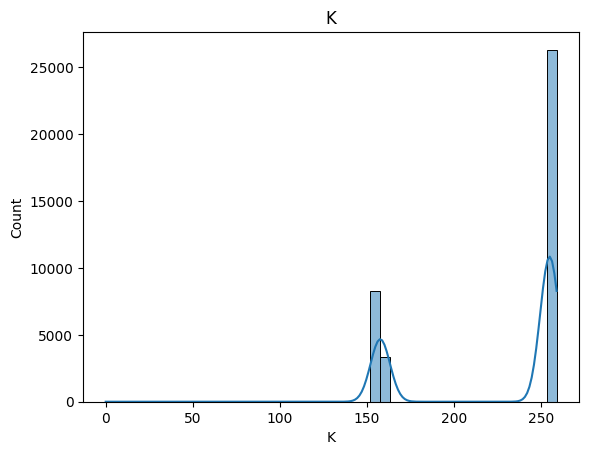

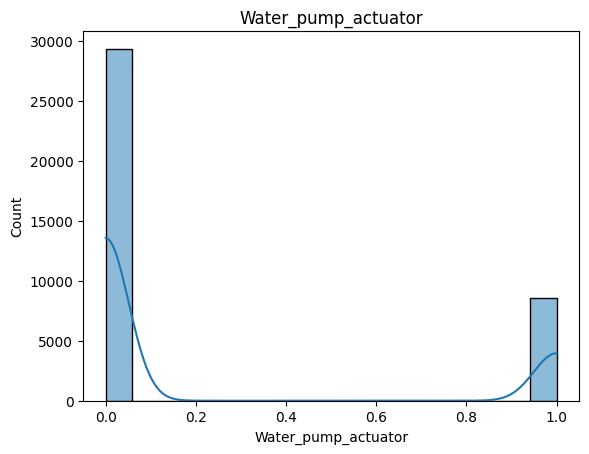

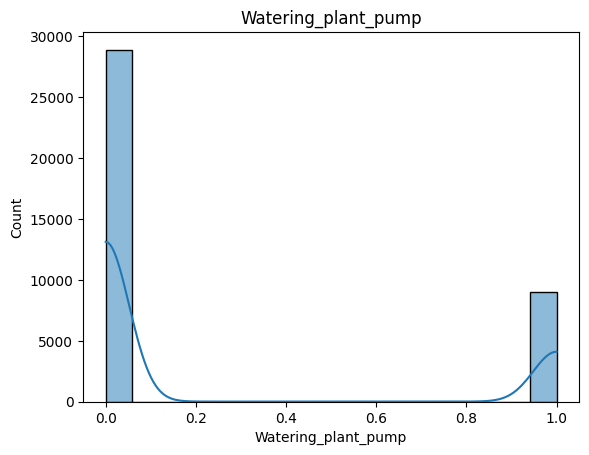

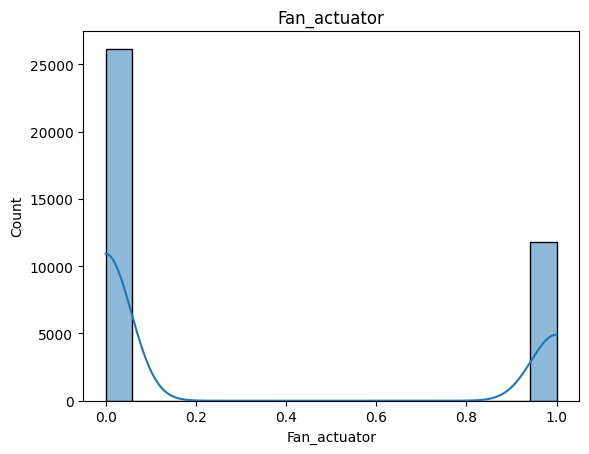

In [24]:
for column in df.columns:    
    sns.histplot(df[column],kde=True)
    plt.title(column)
    plt.show()

- > As Observed values of potassium ,Nitrogen and phosporous values ranges from 150 to 250.

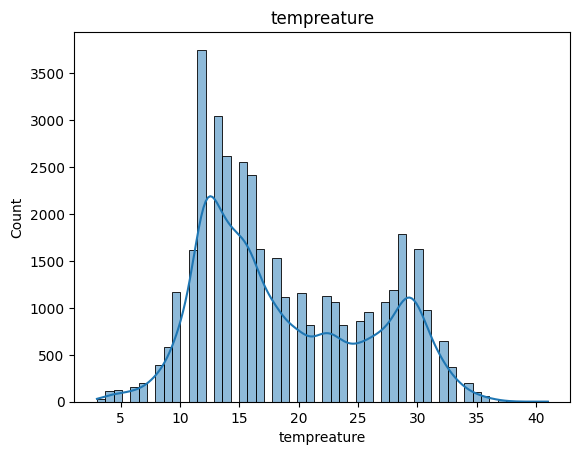

In [25]:
sns.histplot(df["tempreature"],kde=True)
plt.title("tempreature")
plt.show()

- > Temperature are mostly reasonable with 12 to 15 degrees

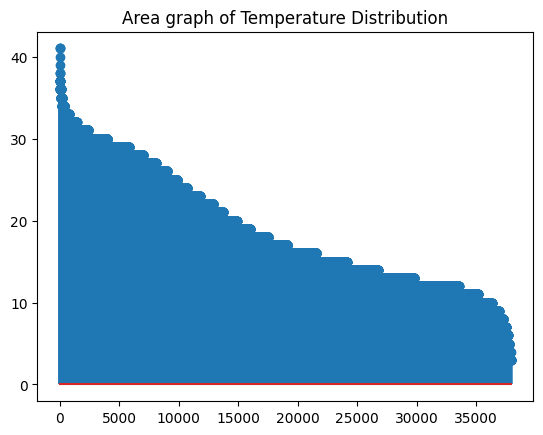

In [26]:
plt.stem(df["tempreature"])
plt.title("Area graph of Temperature Distribution")
plt.show()

- > Temperature keep on Decreasing form 40 to 0 centergrades.

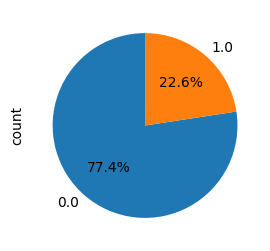

In [27]:
water_counts=df["Water_pump_actuator"].value_counts()
water_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(3, 3))
plt.show()

- > In most of the cases Water pump actuator is in OFF position with 77%  and 23% in ON position

In [28]:
df["Fan_actuator"].value_counts()

Fan_actuator
0.0    26161
1.0    11761
Name: count, dtype: int64

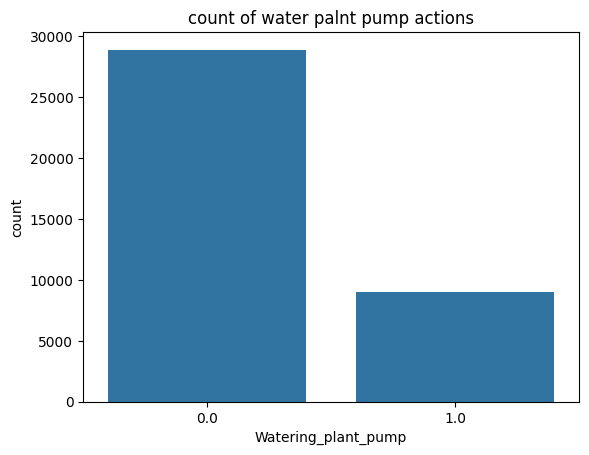

In [29]:
sns.countplot(x=df["Watering_plant_pump"])
plt.title("count of water palnt pump actions")
plt.show()

- > Water Plant pump is in OFF position with 28900 times and 9022 times in ON position

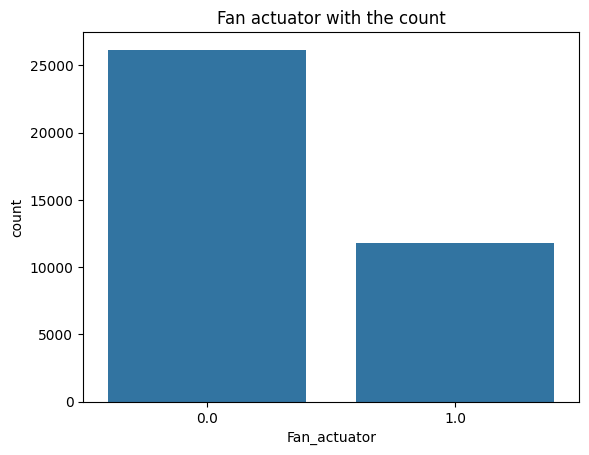

In [30]:
sns.countplot(x=df["Fan_actuator"])
plt.title("Fan actuator with the count")
plt.show()

- > Fan actuator is in OFF position with 26161 and 11761times in ON position

### Bivariate Analysis

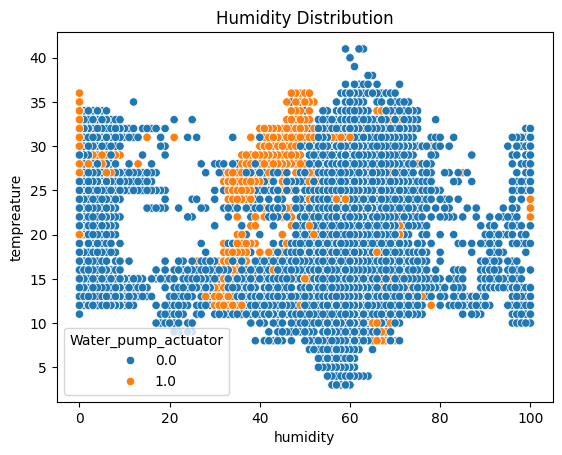

In [31]:
sns.scatterplot(x=df["humidity"],y=df["tempreature"],hue=df["Water_pump_actuator"])
plt.title("Humidity Distribution")
plt.show()

- > water pump actuator on when the temperature between 12 to 40 degrees temperature and hunidity with 35 to 50 

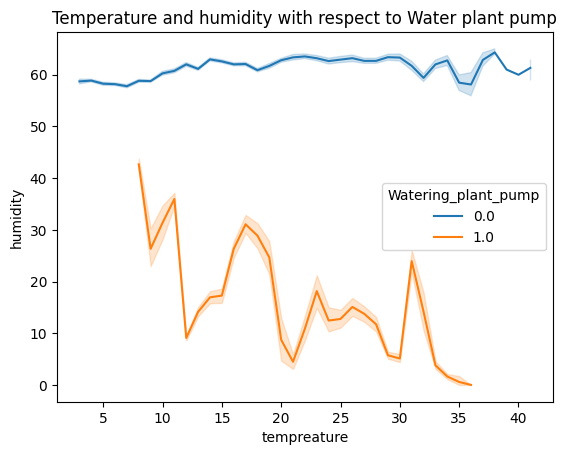

In [32]:
sns.lineplot(data=df, x="tempreature",y="humidity", hue=df["Watering_plant_pump"])
plt.title("Temperature and humidity with respect to Water plant pump")
plt.show()

- > Humidity constantly decreasing by Increasing in temperature when water Plannt pump in ON position
- > Humidity renains constant when Temperature increasses or deccreases.


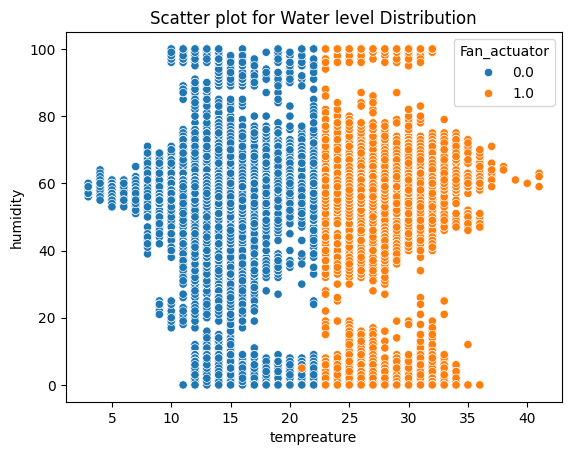

In [33]:
sns.scatterplot(x=df["tempreature"],y=df["humidity"],hue=df["Fan_actuator"])
plt.title("Scatter plot for Water level Distribution")
plt.show()

- >  Fan Actuator is being ON when the Temperaature exceeds 23 degrees  

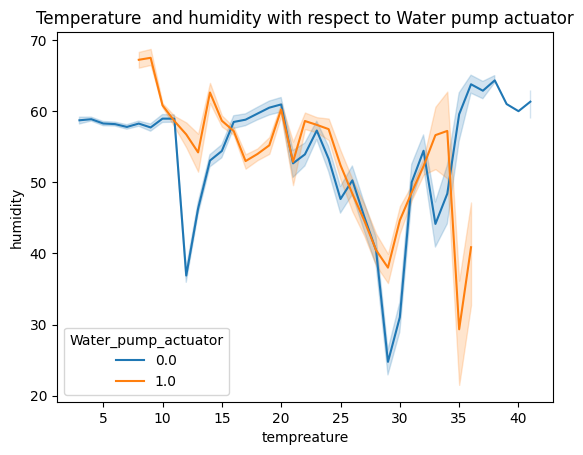

In [34]:
sns.lineplot(data=df, x="tempreature",y="humidity", hue=df["Water_pump_actuator"])
plt.title("Temperature  and humidity with respect to Water pump actuator")
plt.show()

- > small Change is observed  in humidity along the change in temperature when the water pump actuator is in off position.
- >  Gradual drop of humidity witht the change in temperature  when the water pump actuator is in on position.

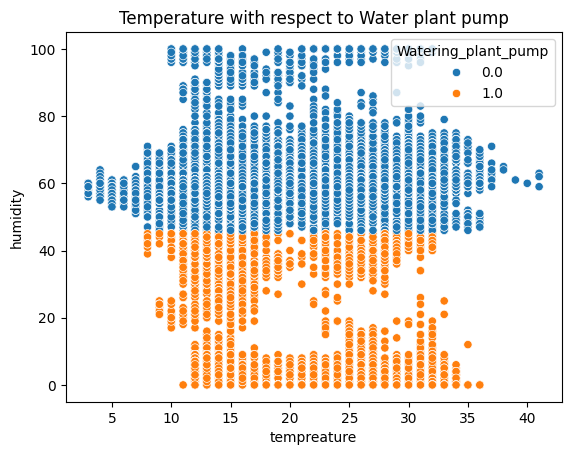

In [35]:
sns.scatterplot(data=df, x="tempreature",y="humidity", hue=df["Watering_plant_pump"])
plt.title("Temperature with respect to Water plant pump")
plt.show()

- > Water plant pump is in ON position when the humidity is below 50 and temperature in 15 to 35 degrees in temperature.

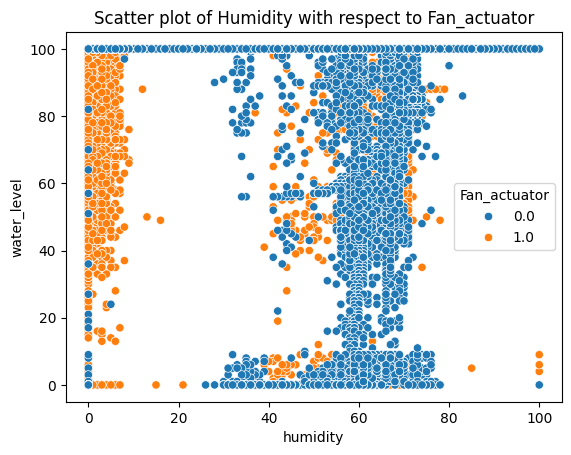

In [36]:
sns.scatterplot(data=df, x="humidity",y="water_level",hue="Fan_actuator")
plt.title("Scatter plot of Humidity with respect to Fan_actuator")
plt.show()

- > Fan actuator is In ON position when the Humidity is lessthan 15

## Multivariate Analysis

#### Correlation Matrix

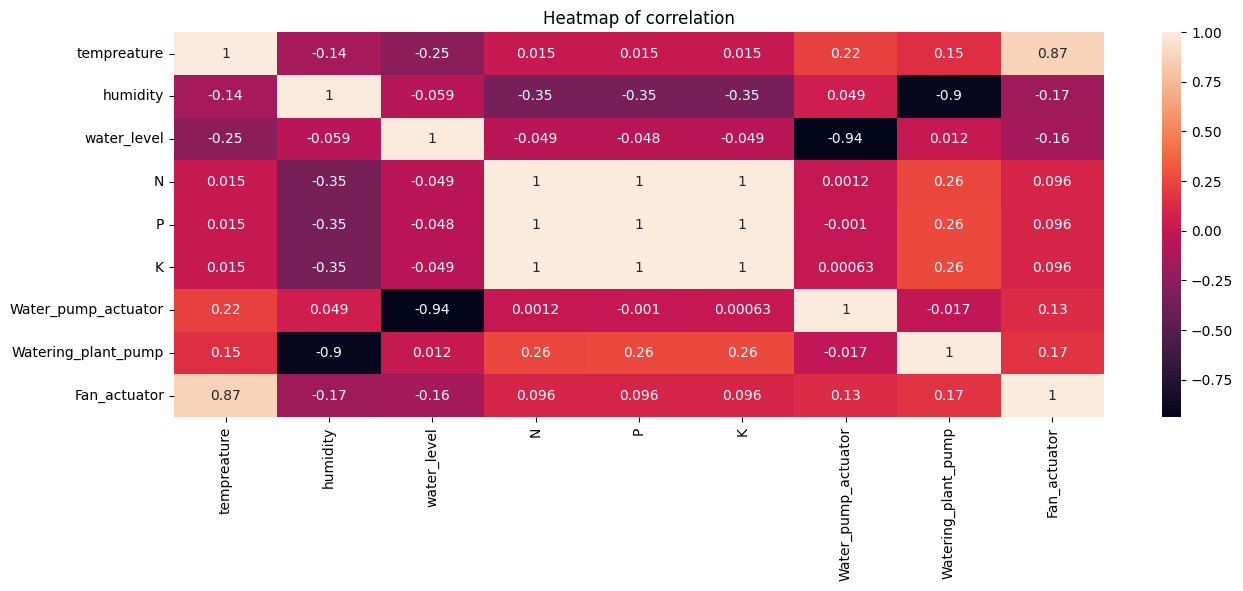

In [37]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.title("Heatmap of correlation")
plt.show()

- Non_correlated to Features 
 - > Humidity is non correlated to Water_plamt_pump
 - > Water_level in non correlated to Water_pump_actuator

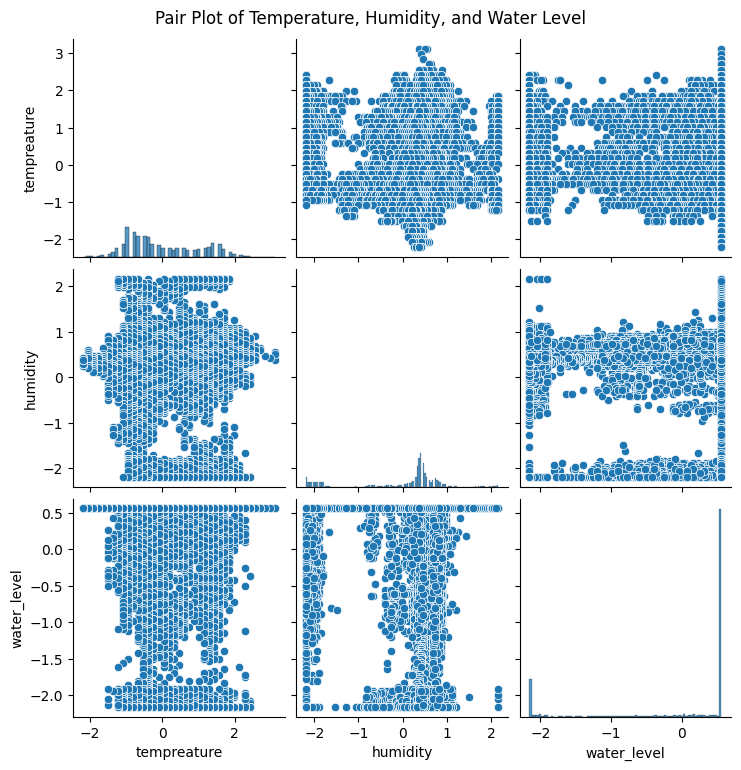

In [97]:
sns.pairplot(df[['tempreature', 'humidity', 'water_level']])
plt.suptitle('Pair Plot of Temperature, Humidity, and Water Level', y=1.02)
plt.show()

### Checking Missing Values

In [39]:
df.isnull().sum()

tempreature            0
humidity               0
water_level            0
N                      0
P                      0
K                      0
Water_pump_actuator    0
Watering_plant_pump    0
Fan_actuator           0
dtype: int64

> There is no missing values so we don't need to handle them

###  HANDLING OUTLIERS

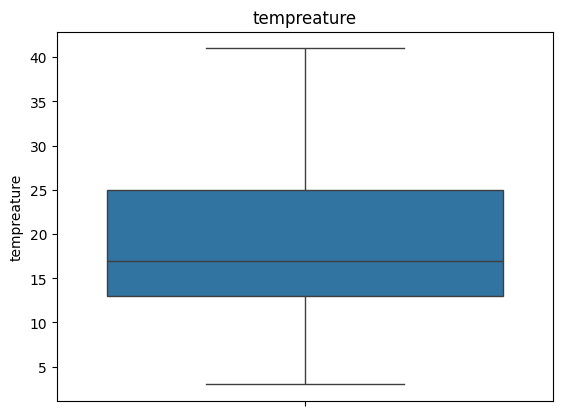

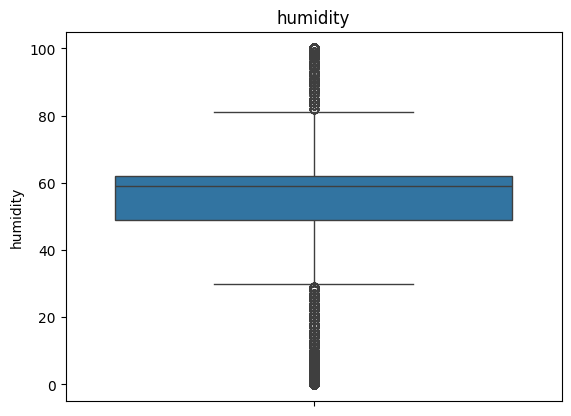

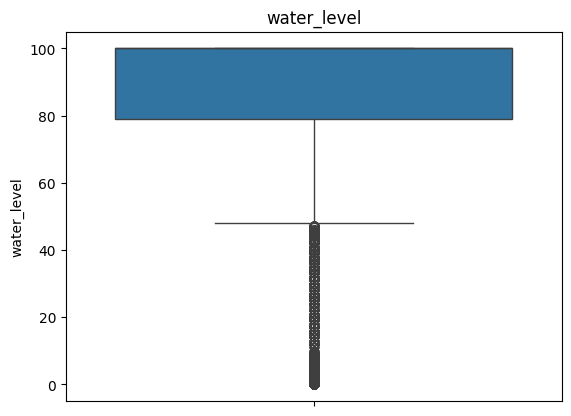

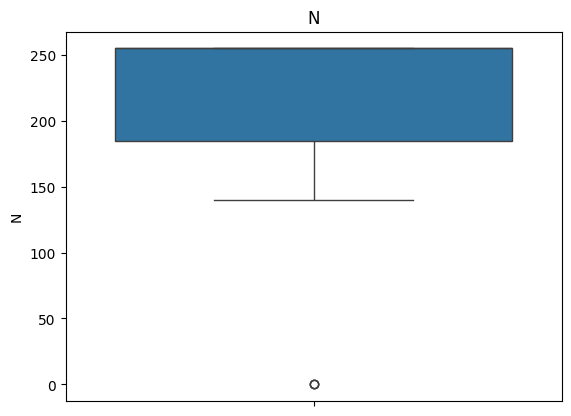

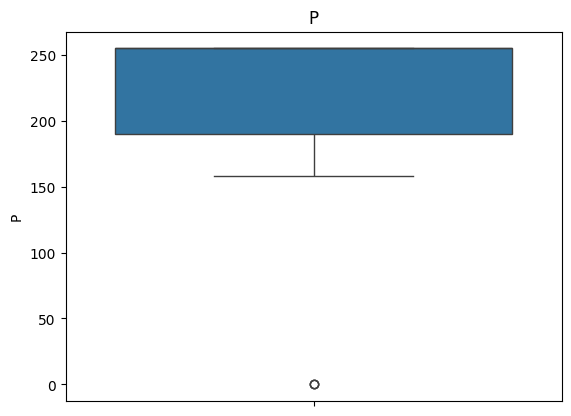

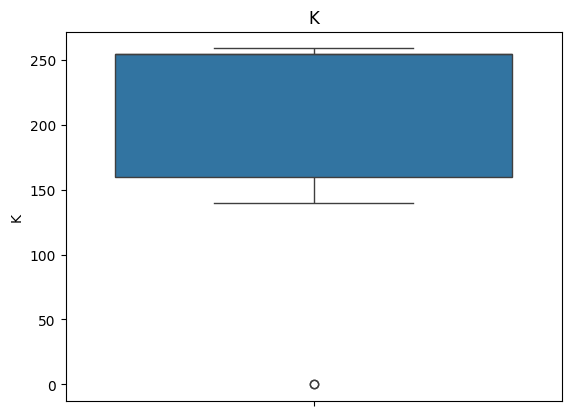

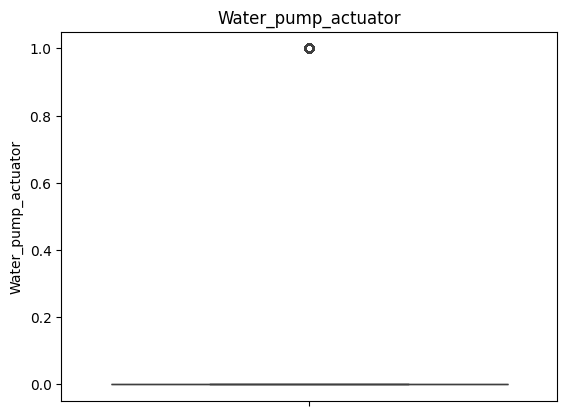

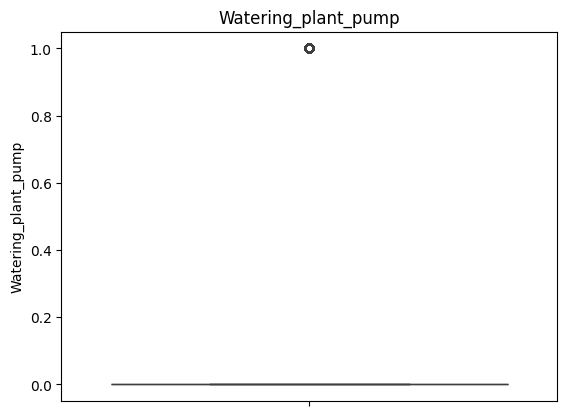

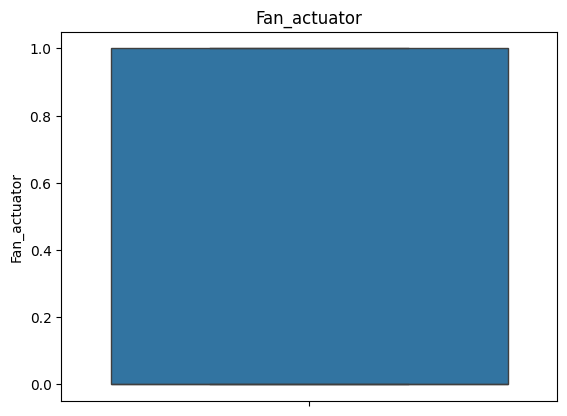

In [40]:
for i in df.columns:
    if type(df[i][0])!=str:
        sns.boxplot(df[i])
        plt.title(i)
        plt.show()

> There are Outliers Present in the Humidity and Water_level 

In [41]:
Q1=df["humidity"].quantile(0.25)

In [42]:
Q3=df["humidity"].quantile(0.75)
IQR=Q3-Q1
upper_limit=Q3+(2.5*IQR)
lower_limit=Q1-(2.5*IQR)

In [43]:
print (upper_limit)
print(lower_limit)

94.5
16.5


In [44]:
df[(df["humidity"]<lower_limit)|(df["humidity"]>upper_limit)]

,tempreature,humidity,water_level,N,P,K,Water_pump_actuator,Watering_plant_pump,Fan_actuator
76,36,0,0,255,255,255,1.0,1.0,1.0
77,36,0,0,255,255,255,1.0,1.0,1.0
78,36,0,0,255,255,255,1.0,1.0,1.0
79,36,0,0,255,255,255,1.0,1.0,1.0
80,35,0,88,185,190,160,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
35245,10,99,100,178,186,157,0.0,0.0,0.0
35246,10,100,100,178,186,157,0.0,0.0,0.0
35247,10,100,100,178,186,157,0.0,0.0,0.0
35248,10,98,100,178,186,157,0.0,0.0,0.0


In [45]:
from feature_engine.outliers import Winsorizer
win=Winsorizer(capping_method='iqr',tail="both", fold=1.5)
win.fit_transform(df[["humidity"]])

,humidity
0,63.0
1,59.0
2,62.0
3,60.0
4,61.0
...,...
37917,59.0
37918,60.0
37919,60.0
37920,59.0


In [46]:
q1=df["water_level"].quantile(0.25)
q3=df["water_level"].quantile(0.75)
iqr1=q3-q1
upper_limit_w=q3+(1.5*iqr1)
lower_limit_w=q1-(1.5*iqr1)


In [47]:
lower_limit_w

47.5

In [48]:
df[(df["water_level"]<lower_limit_w)|(df["water_level"]>upper_limit_w)]

,tempreature,humidity,water_level,N,P,K,Water_pump_actuator,Watering_plant_pump,Fan_actuator
24,36,49,0,255,255,255,1.0,0.0,1.0
25,36,51,0,255,255,255,1.0,0.0,1.0
26,36,48,0,255,255,255,1.0,0.0,1.0
28,36,47,0,255,255,255,1.0,0.0,1.0
29,36,51,0,255,255,255,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
35603,10,60,8,255,255,255,1.0,0.0,0.0
36357,9,67,8,178,186,157,1.0,0.0,0.0
36904,8,68,1,178,186,157,1.0,0.0,0.0
36905,8,69,9,178,186,157,1.0,0.0,0.0


In [49]:
win1=Winsorizer(capping_method='iqr',tail="both", fold=1.5)
win.fit_transform(df[["water_level"]])

,water_level
0,100.0
1,100.0
2,100.0
3,100.0
4,100.0
...,...
37917,100.0
37918,100.0
37919,100.0
37920,100.0


###  Categorical Handling

In [50]:
df["Watering_plant_pump"]=df["Watering_plant_pump"].astype("int")
df["Fan_actuator"]=df["Fan_actuator"].astype("int")
df["Water_pump_actuator"]=df["Water_pump_actuator"].astype("int")

### Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [55]:
columns_to_scale = ['tempreature', 'humidity', 'water_level', 'N', 'P', 'K', 
                    'Fan_actuator', 'Fan_actuator', 'Watering_plant_pump'
                    ]

In [56]:
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [57]:
df

,tempreature,humidity,water_level,N,P,K,Water_pump_actuator,Watering_plant_pump,Fan_actuator
0,3.113379,0.551011,0.559373,0.663535,0.663769,0.664663,0,-0.558731,1.491437
1,3.113379,0.377063,0.559373,0.663535,0.663769,0.664663,0,-0.558731,1.491437
2,3.113379,0.507524,0.559373,0.663535,0.663769,0.664663,0,-0.558731,1.491437
3,2.973388,0.420550,0.559373,0.663535,0.663769,0.664663,0,-0.558731,1.491437
4,2.833398,0.464037,0.559373,0.663535,0.663769,0.664663,0,-0.558731,1.491437
...,...,...,...,...,...,...,...,...,...
37917,-2.206271,0.377063,0.559373,0.663535,0.663769,0.664663,0,-0.558731,-0.670494
37918,-2.206271,0.420550,0.559373,0.663535,0.663769,0.664663,0,-0.558731,-0.670494
37919,-2.206271,0.420550,0.559373,0.663535,0.663769,0.664663,0,-0.558731,-0.670494
37920,-2.206271,0.377063,0.559373,0.663535,0.663769,0.664663,0,-0.558731,-0.670494


### Splitting the data

In [58]:
x=df.drop(df[["Water_pump_actuator"]],axis=1)
y=df["Water_pump_actuator"]

### Balancing

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
smote = SMOTE(random_state=42)
x_sample, y_sample = smote.fit_resample(x, y)

In [61]:
x_sample

,tempreature,humidity,water_level,N,P,K,Watering_plant_pump,Fan_actuator
0,3.113379,0.551011,0.559373,0.663535,0.663769,0.664663,-0.558731,1.491437
1,3.113379,0.377063,0.559373,0.663535,0.663769,0.664663,-0.558731,1.491437
2,3.113379,0.507524,0.559373,0.663535,0.663769,0.664663,-0.558731,1.491437
3,2.973388,0.420550,0.559373,0.663535,0.663769,0.664663,-0.558731,1.491437
4,2.833398,0.464037,0.559373,0.663535,0.663769,0.664663,-0.558731,1.491437
...,...,...,...,...,...,...,...,...
58709,1.433490,-0.405704,-2.156238,0.663535,0.663769,0.664663,1.789771,1.491437
58710,1.013517,-0.531240,-2.156238,0.663535,0.663769,0.664663,1.789771,1.491437
58711,1.433490,0.507524,-2.156238,0.663535,0.663769,0.664663,-0.558731,1.491437
58712,1.573481,0.594498,-2.156238,0.663535,0.663769,0.664663,-0.558731,1.491437


In [62]:
y_sample

0        0
1        0
2        0
3        0
4        0
        ..
58709    1
58710    1
58711    1
58712    1
58713    1
Name: Water_pump_actuator, Length: 58714, dtype: int32

### Train test split

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sample,y_sample,test_size=0.2,random_state=1)

In [64]:
x_train

,tempreature,humidity,water_level,N,P,K,Watering_plant_pump,Fan_actuator
5702,1.433490,0.377063,0.559373,0.663535,0.663769,0.664663,-0.558731,1.491437
58367,1.013517,0.420550,-2.156238,0.663535,0.663769,0.664663,-0.558731,1.491437
14117,0.173573,0.507524,-2.074770,-1.554356,-1.530070,-1.519081,-0.558731,-0.670494
21960,-0.526381,0.724960,0.559373,-1.554356,-1.530070,-1.519081,-0.558731,-0.670494
26733,-0.806363,0.377063,0.559373,-1.352730,-1.402891,-1.452232,-0.558731,-0.670494
...,...,...,...,...,...,...,...,...
50057,1.573481,0.377063,-2.156238,0.663535,0.663769,0.664663,-0.558731,1.491437
32511,-0.946353,0.420550,-0.499716,0.663535,0.663769,0.664663,-0.558731,-0.670494
5192,1.433490,0.507524,0.423592,0.663535,0.663769,0.664663,-0.558731,1.491437
12172,0.453554,0.594498,0.559373,-1.554356,-1.530070,-1.519081,-0.558731,-0.670494


In [65]:
x_test

,tempreature,humidity,water_level,N,P,K,Watering_plant_pump,Fan_actuator
27104,-0.806363,1.333778,0.559373,-1.554356,-1.530070,-1.519081,-0.558731,-0.670494
25654,-0.666372,-1.971239,0.559373,0.663535,0.663769,0.664663,1.789771,-0.670494
47267,0.173573,0.637985,-1.929415,-1.554356,-1.530070,-1.519081,-0.558731,-0.670494
7174,1.153508,-1.536368,0.559373,-1.554356,-1.530070,-1.519081,1.789771,1.491437
18944,-0.246400,0.420550,0.559373,0.663535,0.663769,0.664663,-0.558731,-0.670494
...,...,...,...,...,...,...,...,...
18616,-0.246400,0.464037,-2.156238,0.663535,0.663769,0.664663,-0.558731,-0.670494
28222,-0.806363,-1.884265,0.559373,0.663535,0.663769,0.664663,1.789771,-0.670494
5628,1.433490,0.420550,0.559373,0.663535,0.663769,0.664663,-0.558731,1.491437
53083,1.573481,0.507524,-2.156238,0.663535,0.663769,0.664663,-0.558731,1.491437


In [66]:
y_train

5702     0
58367    1
14117    1
21960    0
26733    0
        ..
50057    1
32511    1
5192     0
12172    0
33003    0
Name: Water_pump_actuator, Length: 46971, dtype: int32

In [67]:
y_test

27104    0
25654    0
47267    1
7174     0
18944    0
        ..
18616    1
28222    0
5628     0
53083    1
21824    0
Name: Water_pump_actuator, Length: 11743, dtype: int32

## Model Building

### Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [69]:
y_pred_train1= model1.predict(x_train)
y_pred_test1=model1.predict(x_test)

In [70]:
from sklearn.metrics import accuracy_score
train_acc1= accuracy_score(y_train,y_pred_train1)
test_acc1=accuracy_score(y_test,y_pred_test1)

In [71]:
print("train Accuracy",train_acc1)
print("test Accuracy",test_acc1)

train Accuracy 0.9848417108428605
test Accuracy 0.9853529762411649


In [72]:
from sklearn.model_selection import cross_val_score
print("cross_val_score",cross_val_score(model1,x_sample,y_sample, cv=5).mean())

cross_val_score 0.9785571643350863


In [73]:
confusion_matrix(y_train,y_pred_train1)

array([[23119,   349],
       [  363, 23140]], dtype=int64)

### Decision Tree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(criterion='gini',max_depth= 5,splitter= 'best')
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [75]:
y_pred_train2=model2.predict(x_train)
y_pred_test2=model2.predict(x_test)

In [76]:
train_acc2=accuracy_score(y_train,y_pred_train2)
test_acc2=accuracy_score(y_test,y_pred_test2)
print("train_accuracy", train_acc2)
print("test accuraccy",test_acc2)

train_accuracy 0.994805305401205
test accuraccy 0.9947202588776293


In [77]:
precision=precision_score(y_train,y_pred_train2)
recall=recall_score(y_train,y_pred_train2)
f1=f1_score(y_train,y_pred_train2)
print("precision",precision)
print("recall",recall)
print("f1_score",f1)

precision 0.9926293048672004
recall 0.997021656809769
f1_score 0.9948206325620887


In [78]:
confusion_matrix(y_train,y_pred_train2)

array([[23294,   174],
       [   70, 23433]], dtype=int64)

In [79]:
#Hyper parameter tuning
estimator=DecisionTreeClassifier()
param_grid={"criterion":["gini","entropy"],"max_depth":list(range(1,6)),"splitter":["best","random"]}
grid=GridSearchCV(estimator,param_grid,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}

### Random Forest Classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(x_train,y_train)

RandomForestClassifier()

In [81]:
y_pred_train3=model3.predict(x_train)
y_pred_test3=model3.predict(x_test)

In [82]:
train_acc3=accuracy_score(y_train,y_pred_train3)
test_acc3=accuracy_score(y_test,y_pred_test3)
print("train accuracy",train_acc3)
print("test accuracy", test_acc3)
print("cross_val_score",cross_val_score(model3,x_train,y_train, cv=5).mean())

train accuracy 0.9981690830512444
test accuracy 0.996678872519799
cross_val_score 0.996657502104941


In [83]:
precision=precision_score(y_train,y_pred_train3)
recall=recall_score(y_train,y_pred_train3)
f1=f1_score(y_train,y_pred_train3)
print("precision",precision)
print("recall",recall)
print("fl score",f1)

precision 0.9974508221098696
recall 0.9988937582436285
fl score 0.998171768707483


In [84]:
print(confusion_matrix(y_train,y_pred_train3))

[[23408    60]
 [   26 23477]]


#### Model Testing

In [86]:
print(model3.predict([[36,49,0,255,255,255,0,1]]))

[0]


In [94]:
print(model1.predict([[47,52,0,225,255,0,1,0]]))

[1]


In [88]:
print(model3.predict([[41,63,100,255,255,255,0,1]]))

[0]


In [89]:
print(model3.predict([[46,89,100,215,215,155,1,1]]))

[0]


In [90]:
print(model3.predict([[41,63,100,255,255,255,0,0]]))

[0]


In [91]:
print(model3.predict([[41,63,100,255,255,255,0,0]]))

[0]


### Saving the model

In [92]:
import joblib 
joblib.dump(model3,open("RF.joblib","wb")) 